# Optical Comms Project 1

This project follows the design of KB1LQD's optical comms AM modulated project LED driver.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Variables

In [11]:
# Global
P5V = 5.0    # 5V power
P3V3 = 3.3 # 3.3V power



## Constant Current Driver

In [12]:
# LED
LED_VF = 2.5 # Volts
LED_IMAX = 0.018 # Amps

# MOSFET (BSH103,235)
Q_RDS_ON_MAX = 0.4 # Ohms
Q_IMAX = 0.85 # Amps
Q_VGS = 0.4 # Volts
Q_PMAX = 0.540 # Watts
Q_RTHJS = 140 #K/W from junction to soldering point


# Current Sense Resistor
R_ISNS = 262 # Ohms

# Microphone Input
VMINPP = 0.001 # Volts
VMAXPP = 0.005 # Volts


In [13]:
# calculate the current sense resistance needed. Calcluate the minimum resistance.
def driver_current_sense_resistance():
    # Calculations
    V_R_MAX = P5V-LED_VF
    R_MIN = V_R_MAX/LED_IMAX
    P_R_MIN = (LED_IMAX**2)*R_MIN
    
    
    # Display
    print("The current sense minimum resistance: {:.4g} Ohms".format(R_MIN))
    print("The current sense resistor dissipation: {:.2} Watts".format(P_R_MIN))
    

driver_current_sense_resistance()

# Choose actual resistor value
R_SNS_REAL = 140 #Ohms

The current sense minimum resistance: 138.9 Ohms
The current sense resistor dissipation: 0.045 Watts


In [14]:
# calculate the real paramters based on resistor chosen.
def driver_current_sense_circuit():
    # Resistor Calculations
    V_R_MAX = P5V-LED_VF
    I_SNS_MAX = V_R_MAX/R_SNS_REAL
    P_R_REAL = (I_SNS_MAX**2)*R_SNS_REAL
    
    # Display
    print("The current sense resistance max current: {:.3g} Amps".format(I_SNS_MAX))
    print("The current sesne resistor maximum dissipation: {:.2} Watts".format(P_R_REAL))

driver_current_sense_circuit()

The current sense resistance max current: 0.0179 Amps
The current sesne resistor maximum dissipation: 0.045 Watts


[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017]
Maximum Resistor Power dissipation: 0.04 Watts
Maximum MOSFET Power dissipation: nan Watts
Maximum LED Power dissipation: 0.043 Watts
Minimum Control Voltage: 0.0V
Maximum Control Voltage: 2.4V
Control Voltage Range: 2.4V
50% Bias Voltage Range: 1.2V


/home/brent/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/home/brent/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


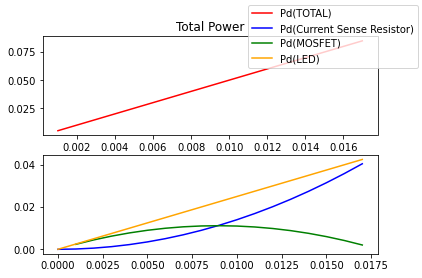

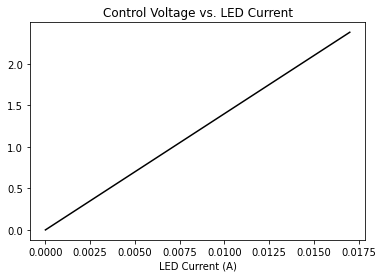

In [15]:
# MOSFET Calculations

def driver_mosfet_power():
    
    # Calculate maximum current power
    # max current is limited by the current sense resistor for LED safety and therefore the MOSFET is in full saturation
    P_Q_MAX = (LED_IMAX**2)*Q_RDS_ON_MAX # Using LED max not real max, slightly conservative
    
    #Create array of current values
    I_ARRAY = np.arange(0.000, LED_IMAX, 0.001)
    print(I_ARRAY)
    
    #Determine MOSFET resistance for given current
    R_Q_RES_ARRAY = []
    
    for i in range(len(I_ARRAY)):
        R_Q_RES_ARRAY.append(((P5V-LED_VF)/I_ARRAY[i])-R_SNS_REAL)
        
    #Determine MOSFET power dissipation for given current
    P_Q_ARRAY = []
    P_R_ARRAY = []
    P_LED_ARRAY = []
    P_TOTAL = []
        
    for i in range(len(R_Q_RES_ARRAY)):
        #Power in resistor
        TEMP_PWR_RESISTOR = ((I_ARRAY[i]**2)*R_SNS_REAL)
        P_R_ARRAY.append(TEMP_PWR_RESISTOR)
        
        #Power in MOSFET
        TEMP_PWR_MOSFET = ((I_ARRAY[i]**2)*R_Q_RES_ARRAY[i])
        P_Q_ARRAY.append(TEMP_PWR_MOSFET)
        
        #Power in LED
        TEMP_PWR_LED = ((I_ARRAY[i])*LED_VF)
        P_LED_ARRAY.append(TEMP_PWR_LED)
        
        #Total Power Dissipation
        P_TOTAL.append(TEMP_PWR_RESISTOR+TEMP_PWR_MOSFET+TEMP_PWR_LED)
        
    #Calculate Control Voltage needed
    V_SNS = []
    for i in range(len(I_ARRAY)):
        V_SNS.append(R_SNS_REAL*I_ARRAY[i])
    
        
    
    
    
    
    #Display
    print("Maximum Resistor Power dissipation: {:.2} Watts".format(max(P_R_ARRAY)))
    print("Maximum MOSFET Power dissipation: {:.2} Watts".format(max(P_Q_ARRAY)))
    print("Maximum LED Power dissipation: {:.2} Watts".format(max(P_LED_ARRAY)))
    
    #Plot
    fig, axs = plt.subplots(2)
    axs[0].plot(I_ARRAY, P_TOTAL, label='Pd(TOTAL)', color="red")
    axs[0].set_title("Total Power")
    axs[0].set(xlabel='LED Current (A)', ylabel='')
    axs[1].plot(I_ARRAY, P_R_ARRAY, label='Pd(Current Sense Resistor)', color="blue")
    axs[1].plot(I_ARRAY, P_Q_ARRAY, label='Pd(MOSFET)', color="green")
    axs[1].plot(I_ARRAY, P_LED_ARRAY, label='Pd(LED)', color="orange")
    fig.legend()
    
    #Control voltage
    fig, ax = plt.subplots()
    ax.plot(I_ARRAY, V_SNS, label='Vcontrol', color="black")
    ax.set_title("Control Voltage vs. LED Current")
    ax.set(xlabel='LED Current (A)', ylabel='')
    
    print("Minimum Control Voltage: {:.2}V".format(min(V_SNS)))
    print("Maximum Control Voltage: {:.2}V".format(max(V_SNS)))
    print("Control Voltage Range: {:.2}V".format(max(V_SNS)-min(V_SNS)))
    print("50% Bias Voltage Range: {:.2}V".format((max(V_SNS)-min(V_SNS))/2))
    
driver_mosfet_power()

In [16]:
def driver_opamp():
    #Gain bandwidth product for this stage is not a driver because the op-amp is being used in unity gain mode.
    return 0
driver_opamp()

0

## Michrophone Amplifier

In [17]:
#This section may currently be incorrect

def pascal_to_dbsbl(pascals):
    return 20*math.log10(pascals/2E-4) #Po is 200 uPa

def dbsbl_to_pascal(dbsbl):
    return 10**(dbsbl/20)*2E-4 #Po is 200 uPa

print(pascal_to_dbsbl(1))
print(dbsbl_to_pascal(96))

73.97940008672037
12.61914688960386


In [19]:
def mic_amplifier():
    VOUT_MAX=2.4 #2.4V is maximum control voltage determined above
    VOUT_BIAS=1.2
    VOUTPP = VOUT_MAX-VOUT_BIAS
    GBP = 24E6 #24MHz
    
    #Operational Amplifier
    AVMIN = VOUTPP/VMAXPP
    AVMAX = VOUTPP/VMINPP
    print("Minimum Mic Gain: {} V/V".format(AVMAX))
    print("Maximum Mic Gain: {} V/V".format(AVMIN))
    
    #Gain stages
    #Stage 1 = 100 V/V
    #Stage 2 = Variable 2.4 to minimum 12 V/V
    # AC coupled, no phase requirements, inverting op-amp is acceptable
    
    #Calculate stage 1
    stage_1_gain = -100 # V/V
    stage_1_RG = 10E3 # 10K
    stage_1_RF = (-1)*(stage_1_RG*stage_1_gain)
    stage_1_GBP = (GBP/abs(stage_1_gain))/1E6
    
    #Display
    print("\n---Stage 1 Op-Amp---")
    print("Stage 1 Gain = {} V/V".format(stage_1_gain))
    print("Stage 1 RG = {} Ohms".format(stage_1_RG))
    print("Stage 1 RF = {} Ohms".format(stage_1_RF))
    print("Stage 1 GBP = {} MHz".format(stage_1_GBP))
    
    
    #Calculate Stage 2
    stage_2_gain_min = -2.4 # V/V
    stage_2_gain_max = -12 # V/V
    stage_2_RG = 10E3 # 10K
    stage_2_RF_min = (-1)*(stage_2_RG*stage_2_gain_min)
    stage_2_RF_max = (-1)*(stage_2_RG*stage_2_gain_max)
    stage_2_GBP = (GBP/abs(stage_2_gain_max))/1E6
    
    #calculate op amp single supply bias resistors
    vout = 1.2
    vin = 5
    stage_2_r2 = 10e3
    stage_2_r1 = stage_2_r2*(vin/vout-1)
    print("Stage 2 R1 = {} Ohms".format(stage_2_r1))
    
    print("\n---Stage 2 Op-Amp---")
    print("Stage 2 Gain(min) = {} V/V".format(stage_2_gain_min))
    print("Stage 2 Gain(max) = {} V/V".format(stage_2_gain_max))
    print("Stage 2 RG = {} Ohms".format(stage_2_RG))
    print("Stage 2 RF(min) = {} Ohms".format(stage_2_RF_min))
    print("Stage 2 RF(max) = {} Ohms".format(stage_2_RF_max))
    print("Stage 2 GBP = {} MHz".format(stage_2_GBP))
    
    
    #GBP_NEEDED
    BW = 4E3 #4KHz voice bandwidth
    
    
    # Gain Needed
    
mic_amplifier()

Minimum Mic Gain: 1200.0 V/V
Maximum Mic Gain: 240.0 V/V

---Stage 1 Op-Amp---
Stage 1 Gain = -100 V/V
Stage 1 RG = 10000.0 Ohms
Stage 1 RF = 1000000.0 Ohms
Stage 1 GBP = 0.24 MHz
Stage 2 R1 = 31666.666666666668 Ohms

---Stage 2 Op-Amp---
Stage 2 Gain(min) = -2.4 V/V
Stage 2 Gain(max) = -12 V/V
Stage 2 RG = 10000.0 Ohms
Stage 2 RF(min) = 24000.0 Ohms
Stage 2 RF(max) = 120000.0 Ohms
Stage 2 GBP = 2.0 MHz


#Headphone Input Stage

In [14]:
def head_amplifier():
    vinput_max = 8 #Vp-p
    Voutput_max = 2.4 #Vp-p
    gain_needed = Voutput_max/vinput_max
    r2 = 10e3
    r1 = r2/gain_needed
    r1_max = 50e3
    gain_max = r2/r1_max
    
    #Display
    print("Gain Needed = {} V/V".format(gain_needed))
    print("R1 = {} Ohms".format(r1))
    print("R2 = {} Ohms".format(r2))
    print("R1 MAX = {} Ohms".format(r1_max))
    print("Gain max = {} V/V".format(gain_max))
head_amplifier()
    
    


Gain Needed = 0.3 V/V
R1 = 33333.333333333336 Ohms
R2 = 10000.0 Ohms
R1 MAX = 50000.0 Ohms
Gain max = 0.2 V/V
